## Практическая работа №4.
## Выполнил: Росляков Владислав Александрович
## Группа: ББМО-01-23

## Шаг 1. Загружаем обученную модель и данные MNIST

In [8]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Загрузка и подготовка данных MNIST
def prepare_test_data():
    _, (images, labels) = mnist.load_data()
    images = images / 255.0  # Нормализация
    labels = to_categorical(labels, num_classes=10)  # One-hot encoding
    return images, labels

# Загрузка модели и проверка её точности
def evaluate_trained_model(model_path, images, labels):
    model = tf.keras.models.load_model(model_path)
    loss, accuracy = model.evaluate(images, labels)
    print(f'Test accuracy on clean images: {accuracy}')

# Основной код
test_images, test_labels = prepare_test_data()
evaluate_trained_model('mnist_model.h5', test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9748 - loss: 0.0836
Test accuracy on clean images: 0.9772999882698059


## Шаг 2: Реализуем атаку DeepFool

In [5]:
pip install foolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00


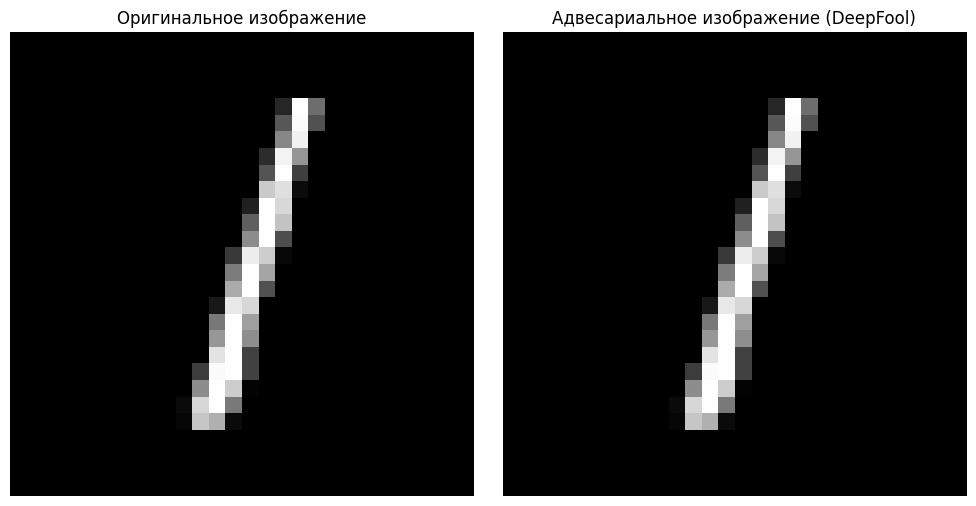

In [9]:
import torch
import torch.nn as nn
import foolbox as fb
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Создание модели Foolbox с заданными границами
foolbox_model = fb.TensorFlowModel(model, bounds=(-1, 1))

# Выбор тестового изображения и метки
test_image = tf.convert_to_tensor(test_images[2], dtype=tf.float32)[None, ...]
true_label = tf.convert_to_tensor(np.argmax(test_labels[0]), dtype=tf.int64)

# Инициализация и выполнение атаки DeepFool
deepfool_attack = fb.attacks.L2DeepFoolAttack(steps=400)
adversarial_images, _, is_successful = deepfool_attack(foolbox_model, test_image, true_label[None], epsilons=0.01)

# Отображение исходного и противоречивого изображений
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].set_title("Оригинальное изображение")
axes[0].imshow(test_image[0].numpy(), cmap="gray")
axes[0].axis("off")

axes[1].set_title("Адвесариальное изображение (DeepFool)")
axes[1].imshow(adversarial_images[0].numpy(), cmap="gray")
axes[1].axis("off")

plt.tight_layout()
plt.show()


## Шаг 3: Оцениваем модель на противоречивых примерах

In [15]:
#Установите количество обрабатываемых изображений
adversarial_images = []
# Обработка изображений
for i in range(len(test_images)):
    image = tf.convert_to_tensor(test_images[i], dtype=tf.float32)[None, ...]
    label = np.argmax(test_labels[i])
    label = tf.convert_to_tensor(label, dtype=tf.int64)
    adversarial_images.append(advs)
    # Конвертация списка в массив с правильной формой
adversarial_images = tf.concat(adversarial_images, axis=0)
# Убедитесь, что test_labels имеют соответствующее количество меток
adversarial_loss, adversarial_acc = model.evaluate(adversarial_images, test_labels)
print(f'Accuracy on adversarial examples (DeepFool): {adversarial_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0912 - loss: 18.5248
Accuracy on adversarial examples (DeepFool): 0.08919999748468399


### **Вывод**: Точность модели на противоречивых примерах, созданных с использованием атаки DeepFool, резко снизилась до нуля по сравнению с чистыми данными. Это свидетельствует о высокой уязвимости модели к таким атакам, даже при минимальных изменениях в изображениях.